In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customer Churn.csv')
#READ CSV FILE

In [3]:
df
#LIST CSV

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.dtypes
#FIND DATA TYPES

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
#CHANGE DATA TYPE

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
df['Churn'].value_counts()
#FIND YES AND NO

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
df['Churn'] = df['Churn'].apply(lambda x:0 if x == 'No' else 1)
#CONVERT YES AND NO TO 1'S AND 0'S

In [9]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [10]:
corr_matrix = df.corr()

In [11]:
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150889,-0.352229,0.193356,-0.199484,1.000000


In [12]:
num_features_cor = (corr_matrix['Churn'].sort_values(ascending=False))
#SORT IN DESCENDING

In [13]:
num_features_cor

Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199484
tenure           -0.352229
Name: Churn, dtype: float64

In [14]:
num_features=['MonthlyCharges','SeniorCitizen','tenure','TotalCharges']

In [15]:
cat_features = []
for i in df.columns.to_list():
    if (df[i].dtype == 'object'):
        cat_features.append(i)

In [16]:
cat_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [17]:
Y = df['Churn']

In [18]:
X = df[cat_features]


In [19]:
X.drop('customerID',axis=1,inplace=True)

C:\Users\Abdullah\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
encoder = LabelEncoder()
for column in X.columns.to_list():
    X[column] = encoder.fit_transform(X[column])

<ipython-input-20-5ffc3b464f99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = encoder.fit_transform(X[column])


In [21]:
X

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [22]:
chi_scores = chi2(X,Y)

In [23]:
p_val = pd.Series(chi_scores[1],index = X.columns)

In [24]:
p_val.sort_values(ascending=True,inplace=True)
p_val

Contract            1.227941e-244
OnlineSecurity      5.615882e-122
TechSupport         8.086236e-116
OnlineBackup         5.707869e-52
DeviceProtection     1.651539e-43
Dependents           8.876729e-31
PaperlessBilling     8.661987e-25
Partner              1.104764e-19
PaymentMethod        2.040933e-14
InternetService      1.725279e-03
MultipleLines        1.796233e-03
StreamingMovies      4.108113e-03
StreamingTV          6.203556e-03
gender               6.110156e-01
PhoneService         7.551421e-01
dtype: float64

In [25]:
categorical_features=p_val.index[0:5]
categorical_features

Index(['Contract', 'OnlineSecurity', 'TechSupport', 'OnlineBackup',
       'DeviceProtection'],
      dtype='object')

In [26]:
best_features = num_features

In [27]:
best_features.extend(categorical_features)

In [28]:
best_features

['MonthlyCharges',
 'SeniorCitizen',
 'tenure',
 'TotalCharges',
 'Contract',
 'OnlineSecurity',
 'TechSupport',
 'OnlineBackup',
 'DeviceProtection']

In [29]:
#df1= pd.concat([X,Y],axis=1)


In [30]:
#df1

In [31]:
#cat_cor_mat = df1.corr()

In [32]:
#cat_cor_mat

In [33]:
#cat_fet = (cat_cor_mat['Churn'].sort_values(ascending=False))

In [34]:
#cat_fet

In [35]:
df1 = pd.read_csv('Customer Churn.csv')

In [36]:
df1['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [37]:
encoder = LabelEncoder()
for i in df1.columns.to_list():
    if df1[i].dtype == 'object':
        df1[i] = encoder.fit_transform(df1[i])

In [38]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [39]:
cor_matdf1 = df1.corr()

<AxesSubplot:>

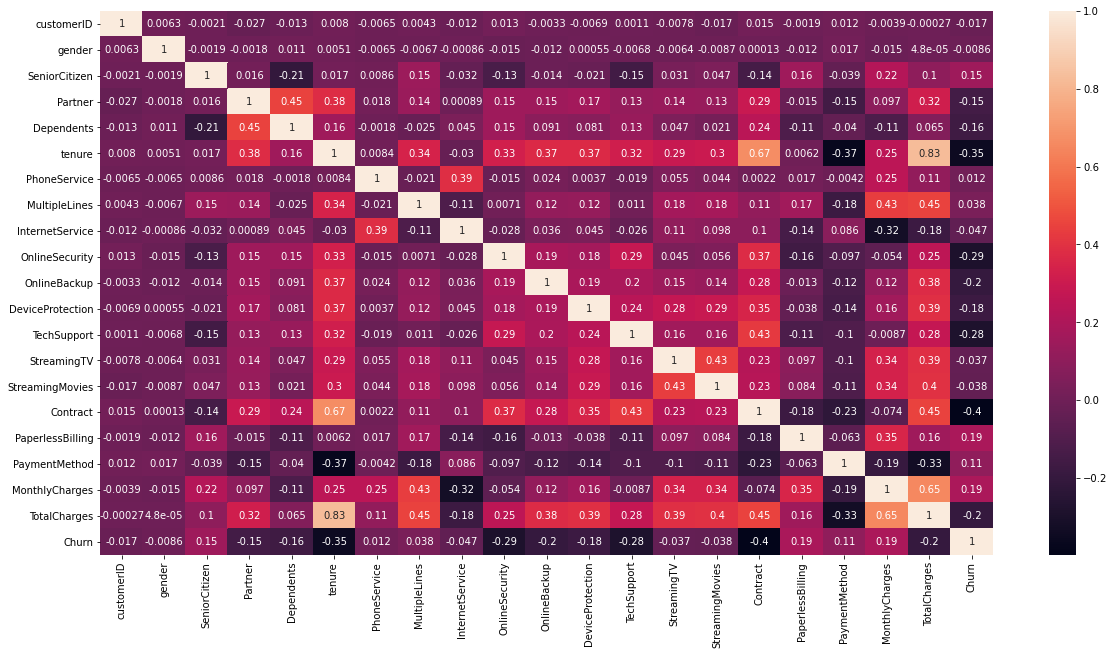

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(cor_matdf1,annot=True)

### By seeing the heatmap generated, we can see tenure ,contract,tenure and total charges have strong relation.Acc to my assumption , I have found 4 numerical variables which have moderate relation with churn variable, and 5 categorical variables .